In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
plt.rcParams['font.sans-serif']=['FangSong'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

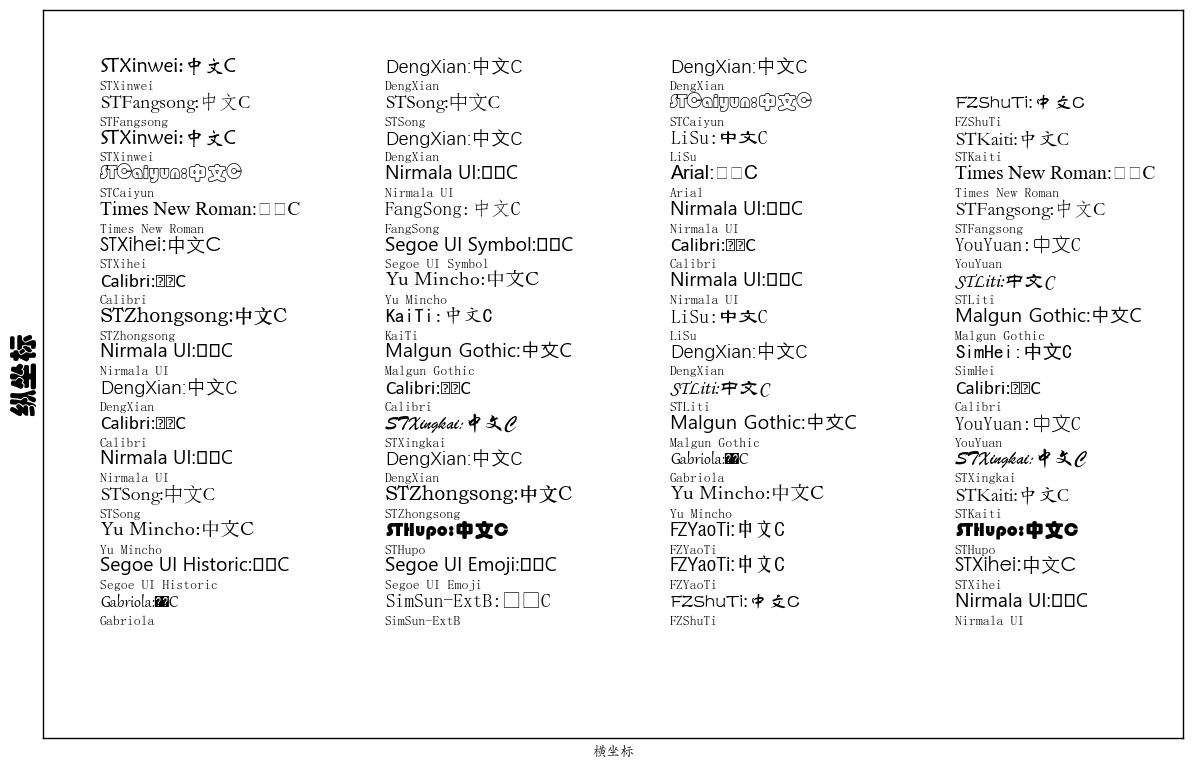

In [4]:
from matplotlib.font_manager import fontManager 
import matplotlib.pyplot as plt 
import os 
import os.path 

fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
#subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
plt.subplots_adjust(0.04, 0.04, 0.99, 0.95, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 

#查看你系统中所有可用的中文字体
fonts = [font.name for font in fontManager.ttflist if os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, font+":"+u"中文C", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
ax.set_xlabel(u'横坐标',{'fontname':'STKaiti'})
ax.set_ylabel(u'纵坐标',{'fontname':'STHupo','fontsize':20})
plt.show() 

In [51]:
dataSheetFile = open('data.pkl','rb')
dataSheet = pickle.load(dataSheetFile)



In [52]:
for i in range(len(dataSheet)):
    for j in range(40):
        if j in [6, 7, 8, 9] and i > 0:
            if type(dataSheet[i][j]) == type(''):
                
                if ',' in dataSheet[i][j]:
                    dataSheet[i][j] = dataSheet[i][j].replace(',', '')
                if '万' in dataSheet[i][j]:
                    dataSheet[i][j] = dataSheet[i][j].replace('万', '0000')
                if '+' in dataSheet[i][j]:
                    _ = dataSheet[i][j].split('+')
                    dataSheet[i][j] = int(_[0]) + int(_[1])
                if dataSheet[i][j] == '':
                    dataSheet[i][j] = np.nan
            if dataSheet[i][j] != np.nan:
                try:
                    dataSheet[i][j] = int(dataSheet[i][j])
                except ValueError:
                    pass
#                     print(dataSheet[i][j].strip())

In [53]:
dsArray = np.array(dataSheet)
df = pd.DataFrame(dsArray[1:],columns=dsArray[0])



In [54]:
# kindergardenTuition = df[df.'幼儿园学费'!='nan']
# df.sort_values('幼儿园学费')
print(df.columns)
# df.columns = ['SchoolName','SchoolEnName','SchoolProperty','OperationState','BuiltTime','Grades','KingderGartenTuition','PrimaryTuition','JuniorTuition',
#       'HighSchoolTuition','Website','Telephone','Address','InternationalCertificationTime', 'numberofclubs', 'AverageAnnualIncome',
#        'TotalCapacity(InternationalDepartment)', 'Certification', 'NumberofGraduatingClasses(InternationalDepartment)',
#        'StudentsMainNationality', 'NumberofStudentsTotal(InternationalDepartment)', 'NumberofKindergartenStudents',
#        'NumberofElementarySchoolStudents', 'NumberofJuniorStudents', 'Numberof HighStudents',
#        'ParticipationinExternalExaminationsAndAssessments', 'International course'
#        , 'Principal/InternationalDirectorsNationality', 'Numberof totalEmployees', 'RemunerationTeachers_3years_',
#        'Number ofTotalTeachers', 'Training investmentPerTeacherPer year', 'NumberofForeignTeachers', 'Teacher-to-studentRatio',
#        'Train loss rate forTeachers', 'SlotArea_Mu_' , 'BuildingArea_m2_', 'HardwareFacilities', 'InvestmentInformation', 'Remarks'
# ]
kindergardenTuition = df[np.isfinite(df.loc[:,'幼儿园学费'])]

Index(['学校名称', '学校英文名称', '学校性质', '学校运营状态', '建校时间', '学制', '幼儿园学费', '小学学费',
       '初中学费', '高中学费', '官网', '电话', '地址', '国际课程认证时间', '俱乐部数量', '平均年收入',
       '总容量（国际部）', '认证', '毕业班人数（国际部）', '学生主要国籍', '在校生总人数（国际部）', '幼儿园学生数',
       '小学学生数', '初中学生人数', '高中学生人数', '参加外部考试与评估', '国际课程', '校长/国际部主任国籍', '总员工数量',
       '教师薪酬（三年经验）', '总教师数量', '师均年培训投入', '外籍教师数量', '师生比', '教师流失率', '占地面积(亩)',
       '建筑面积（平方米）', '硬件设施', '投资信息', '备注'],
      dtype='object')


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

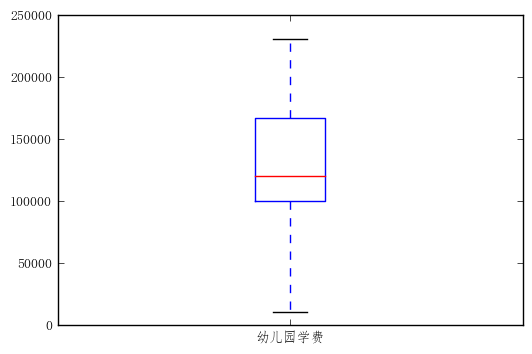

In [26]:
kindergardenTuition = df.loc[:,'幼儿园学费']
kindergardenTuition = kindergardenTuition[kindergardenTuition!='nan']
kindergardenTuition = kindergardenTuition.astype(int)
ax = kindergardenTuition.plot.box()
plt.show()

# sns.boxplot(x="qdepth", hue="mode", y="dur", data=kindergardenTuition,)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

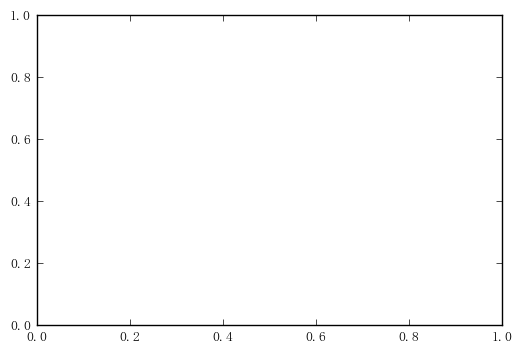

In [5]:
ax = sns.boxplot(y = kindergardenTuition)


In [ ]:
dsFrame = pd.DataFrame(dataSheet,header=0)
# dsFrame.loc[:,6].boxplot()
dsFrame[0:10]

In [ ]:
dsFrame.describe()